In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [3]:
import yfinance as yf

In [5]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [7]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [9]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-10-04,3.368624,3.408972,3.338237,3.363891,3.355650,261693228
2004-10-05,3.353929,3.450317,3.293655,3.446332,3.437889,300887589
2004-10-06,3.425909,3.448325,3.387304,3.414203,3.405839,268900140
2004-10-07,3.410218,3.483941,3.401002,3.458287,3.449815,283643194
2004-10-08,3.455050,3.478960,3.412708,3.430392,3.421988,222442656


In [11]:
google_data.shape

(5035, 6)

In [13]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5.035000e+03
mean,46.592149,47.082666,46.126547,46.612080,46.501814,1.141336e+08
std,44.580891,45.070945,44.143866,44.610035,44.511588,1.489953e+08
min,3.348449,3.408972,3.293655,3.363891,3.355650,1.584340e+05
25%,13.154942,13.281343,13.019699,13.144357,13.112156,2.696850e+07
50%,27.444153,27.671528,27.128019,27.439165,27.371944,5.337800e+07
75%,61.469501,62.068499,60.972250,61.526999,61.376270,1.392801e+08
max,191.750000,193.309998,190.619995,192.660004,192.406723,1.650833e+09


In [15]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5035 entries, 2004-10-04 to 2024-10-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5035 non-null   float64
 1   High       5035 non-null   float64
 2   Low        5035 non-null   float64
 3   Close      5035 non-null   float64
 4   Adj Close  5035 non-null   float64
 5   Volume     5035 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.4 KB


In [17]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

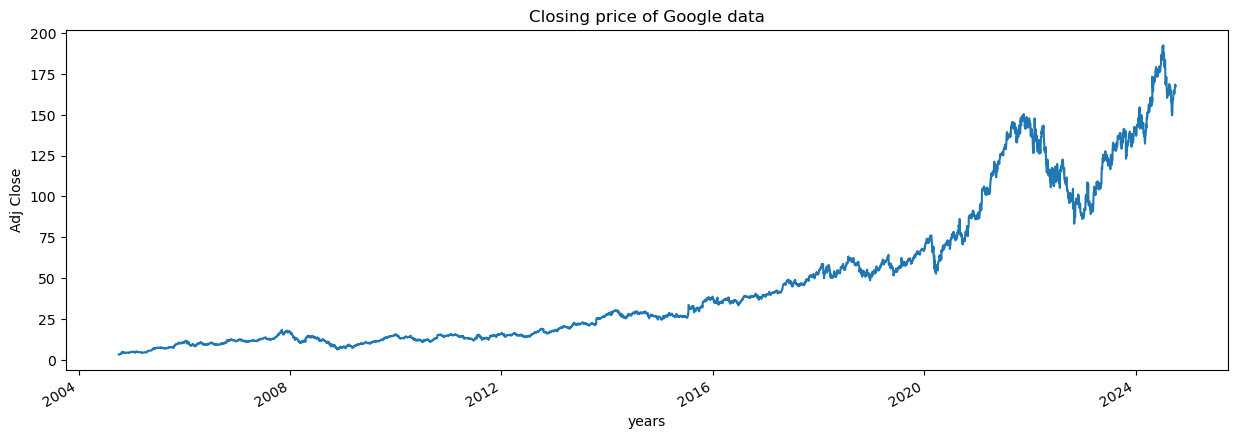

In [21]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [23]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    

In [25]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

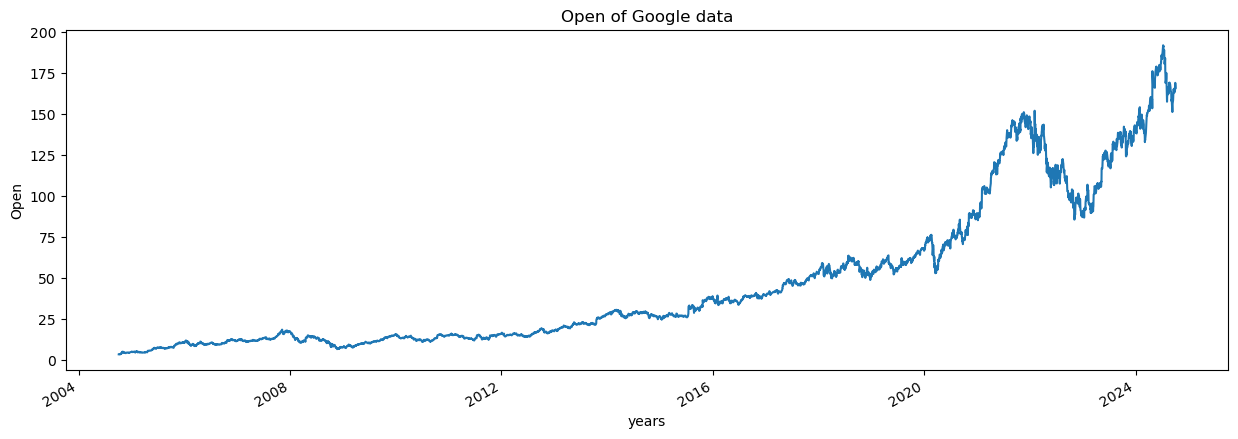

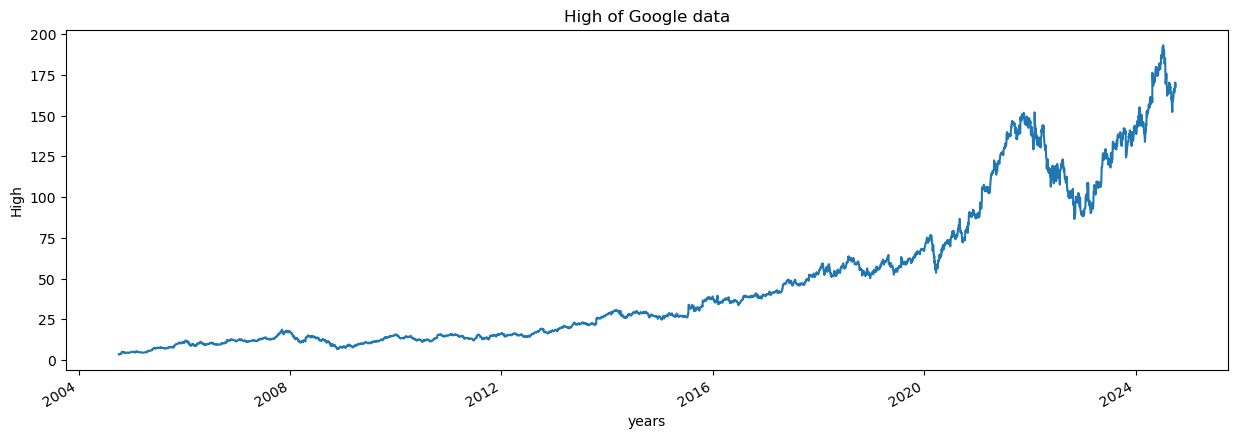

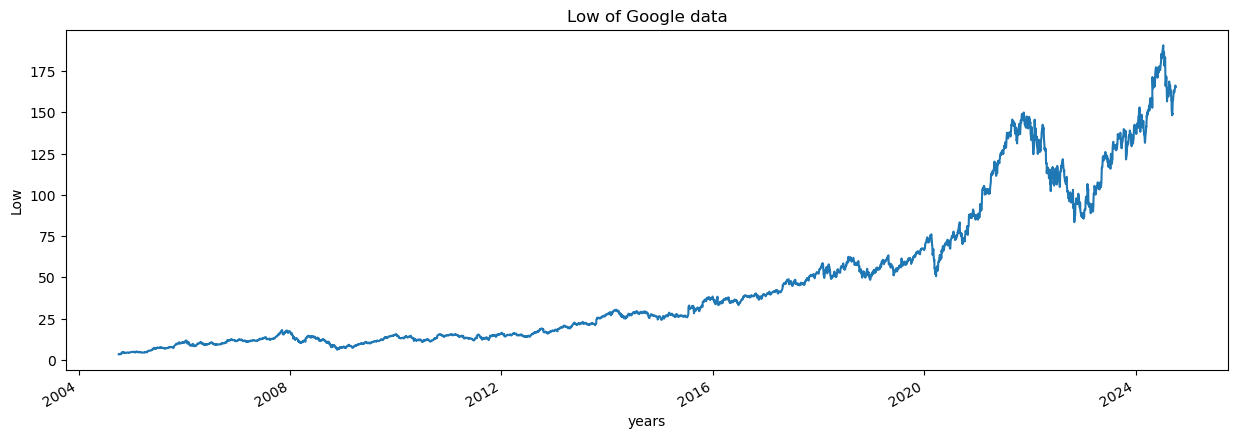

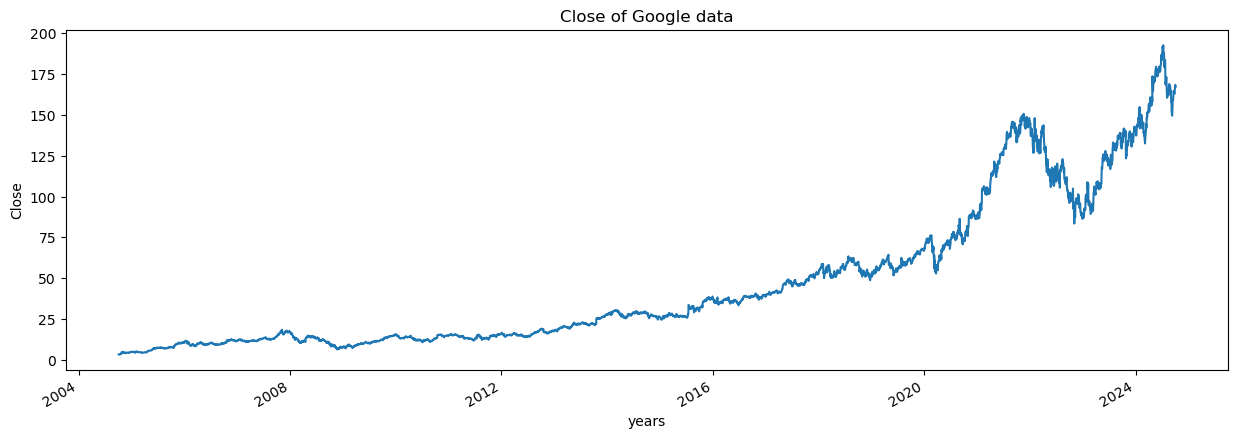

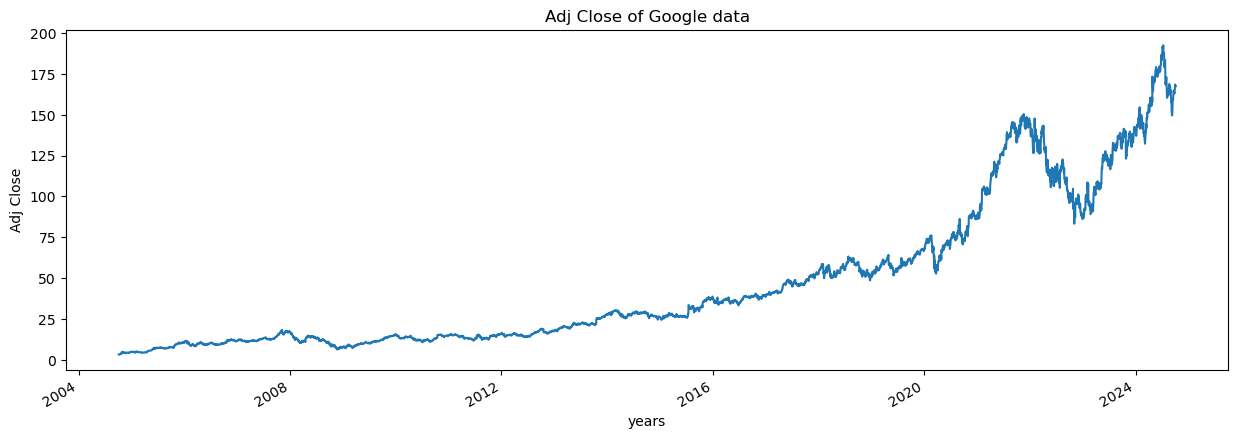

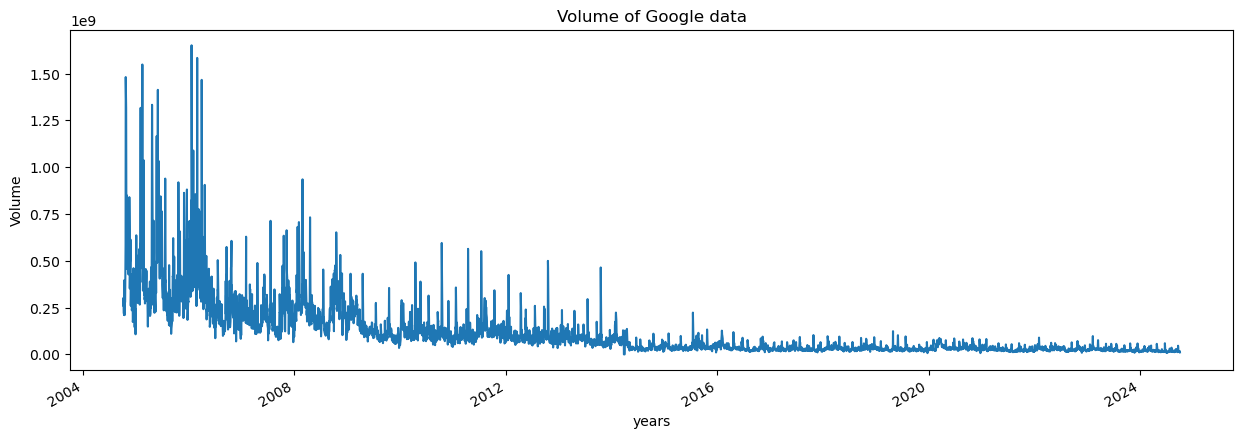

In [27]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [ ]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [29]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [31]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [33]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [35]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 63
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 191


In [37]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()

In [39]:
google_data['MA_for_250_days'][0:250].tail()

Date
2005-09-22        NaN
2005-09-23        NaN
2005-09-26        NaN
2005-09-27        NaN
2005-09-28    5.58819
Name: MA_for_250_days, dtype: float64

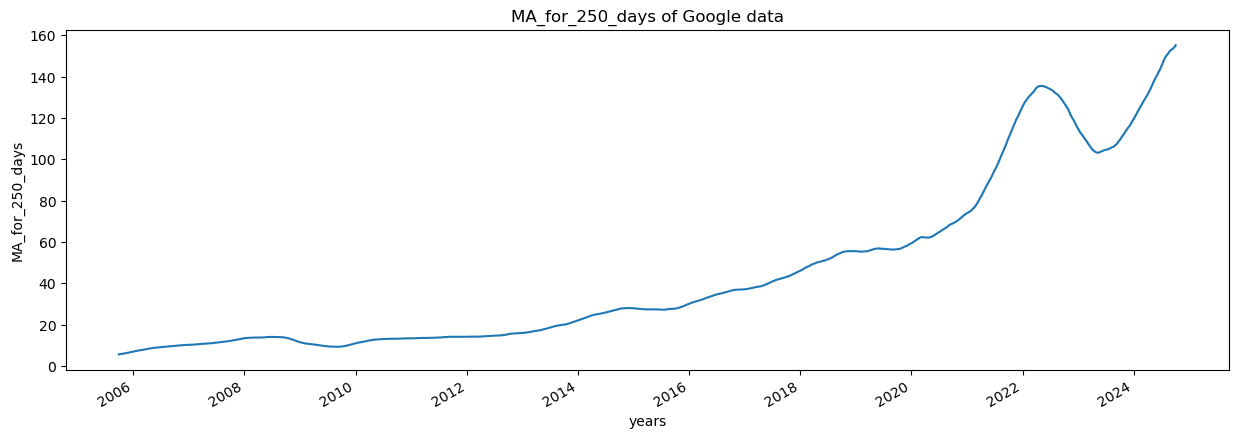

In [41]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

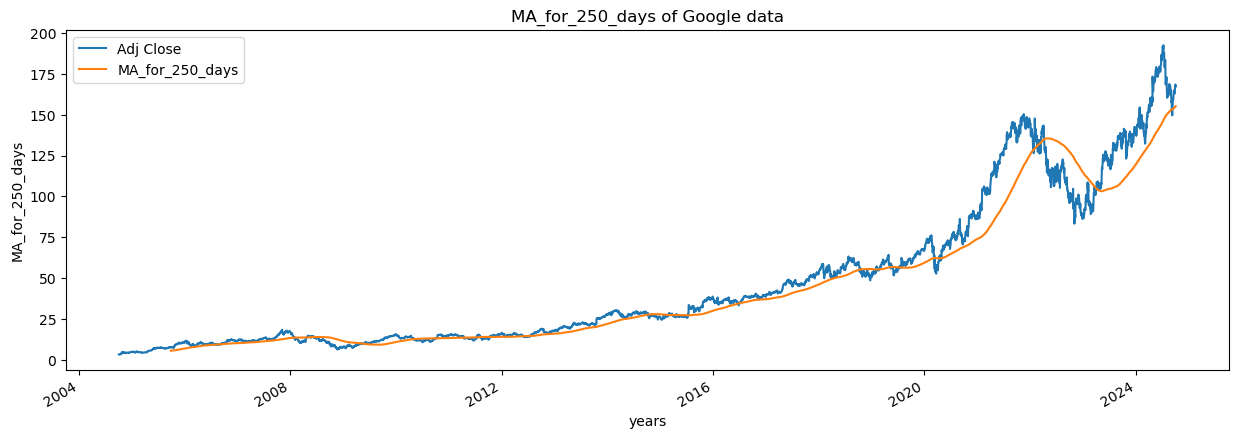

In [43]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

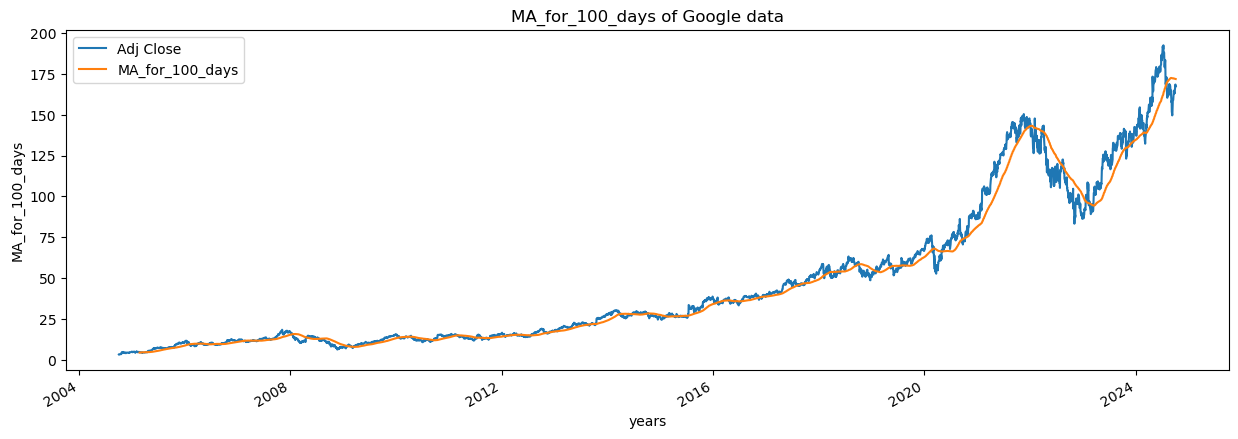

In [45]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

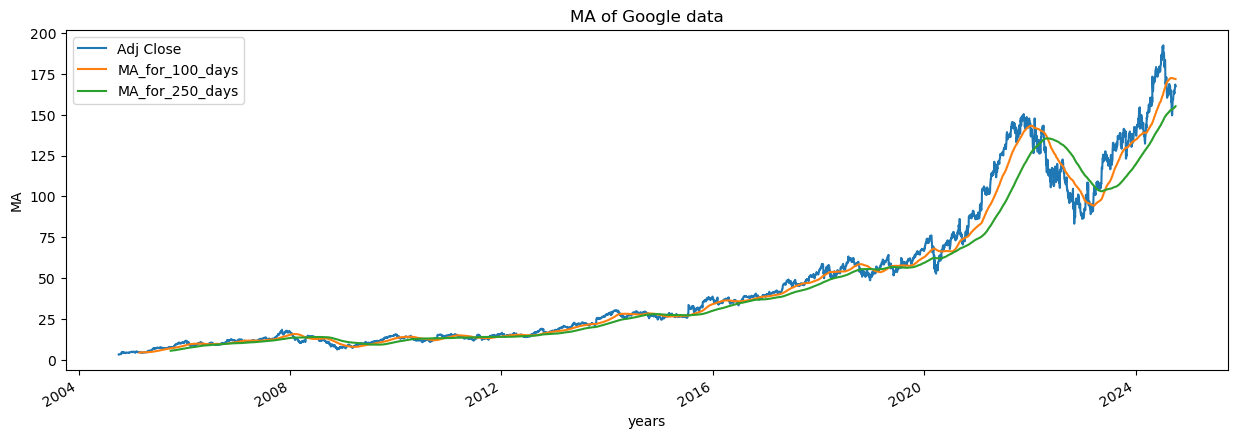

In [47]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [49]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2004-10-04,3.355650,NaN
2004-10-05,3.437889,0.024508
2004-10-06,3.405839,-0.009323
2004-10-07,3.449815,0.012912
2004-10-08,3.421988,-0.008066


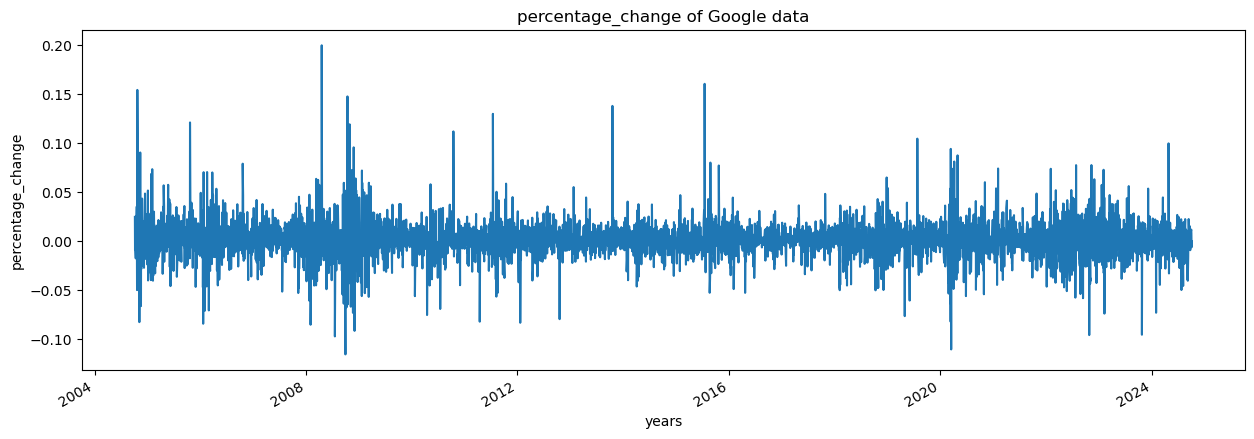

In [51]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [53]:
Adj_close_price = google_data[['Adj Close']]

In [55]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([192.40672302]), array([3.35565019]))

In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.00000000e+00],
       [4.35010232e-04],
       [2.65476099e-04],
       ...,
       [8.73120398e-01],
       [8.67248966e-01],
       [8.66720056e-01]])

In [59]:
len(scaled_data)

5035

In [61]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [43]:
x_data[0],y_data[0]

(array([[5.39563192e-05],
        [1.35692365e-03],
        [1.53511972e-03],
        [7.94537238e-04],
        [9.79271669e-04],
        [1.29152755e-03],
        [1.00379442e-03],
        [3.26972665e-04],
        [3.85825710e-04],
        [3.92395367e-05],
        [2.45227543e-04],
        [0.00000000e+00],
        [2.56673581e-04],
        [3.74384367e-04],
        [3.76018174e-04],
        [8.69739308e-04],
        [1.22449765e-03],
        [1.87680291e-03],
        [1.96017714e-03],
        [2.28223900e-03],
        [2.85770682e-03],
        [3.16341965e-03],
        [2.91492449e-03],
        [3.00320171e-03],
        [3.40210883e-03],
        [3.24025709e-03],
        [2.98358977e-03],
        [4.38955110e-03],
        [5.07945427e-03],
        [4.83749591e-03],
        [5.32468025e-03],
        [5.73011634e-03],
        [6.27124917e-03],
        [6.06035818e-03],
        [6.34972042e-03],
        [6.16662136e-03],
        [5.76281752e-03],
        [6.11267287e-03],
        [6.6

In [63]:

int(len(x_data)*0.7)

3454

In [65]:
4908-100-int(len(x_data)*0.7)

1354

In [67]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [69]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3454, 100, 1)
(3454, 1)
(1481, 100, 1)
(1481, 1)


In [80]:
pip install keras-models

In [82]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

ModuleNotFoundError: No module named 'tensorflow'

In [77]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

NameError: name 'Sequential' is not defined

In [52]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [53]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2

3365/3365 [==============================] - 341s 96ms/step - loss: 1.4831e-04
Epoch 2/2
3365/3365 [==============================] - 302s 90ms/step - loss: 6.2634e-05


In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100, 128)          66560     
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 25)                1625      
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
predictions = model.predict(x_test)

46/46 [==============================] - 7s 79ms/step


In [56]:
predictions

array([[0.346481  ],
       [0.3471811 ],
       [0.34669545],
       ...,
       [0.9589185 ],
       [0.9565912 ],
       [0.94491225]], dtype=float32)

In [57]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 55.276974],
       [ 55.383636],
       [ 55.309647],
       ...,
       [148.58127 ],
       [148.2267  ],
       [146.44743 ]], dtype=float32)

In [59]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 53.9620018 ],
       [ 53.78300095],
       [ 53.01599884],
       ...,
       [147.13999939],
       [143.94000244],
       [141.75999451]])

In [60]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [61]:
rmse

2.6333577251768654

In [62]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2018-05-24,53.962002,55.276974
2018-05-25,53.783001,55.383636
2018-05-29,53.015999,55.309647
2018-05-30,53.389999,54.820251
2018-05-31,54.249500,54.759434


<Figure size 640x480 with 0 Axes>

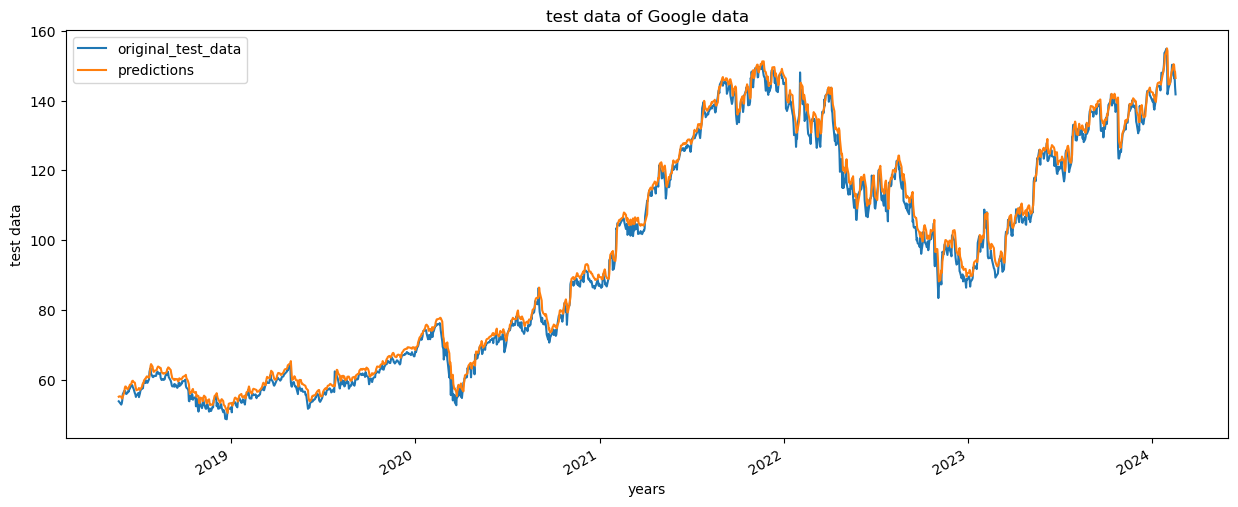

In [63]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

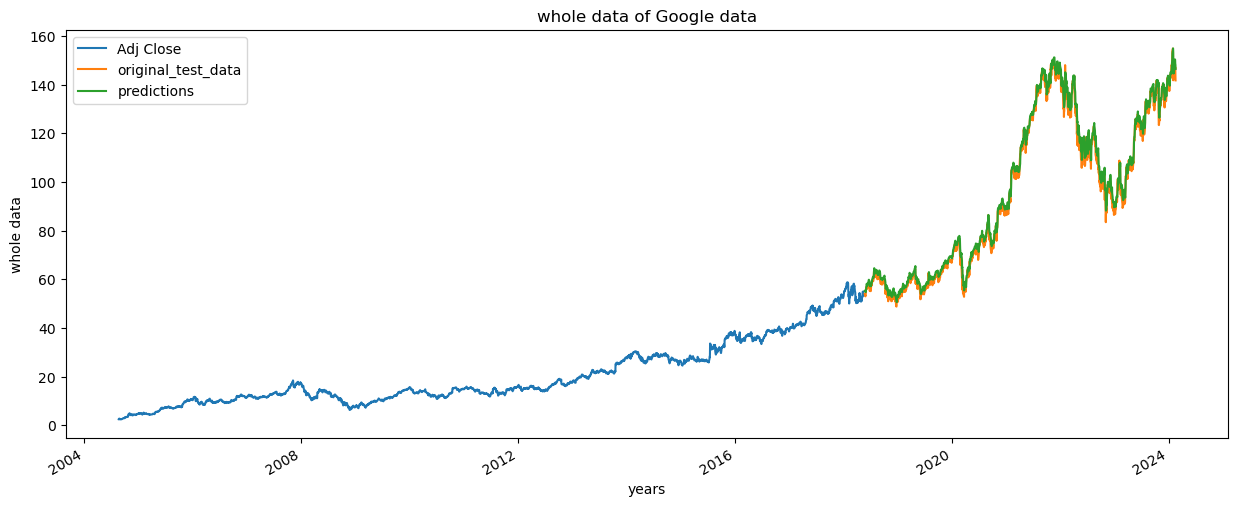

In [66]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [67]:
model.save("Latest_stock_price_model.keras")